## Project Summary

### Project Background and Significance:

Yahoo Finance as a popular Python API source ("yfinance") for getting financial data, has recently going through unstable breakdowns and updates these days, e.g. sometimes losing entire days of quotes or encountering rate-limit blocks. To safeguard our consistent and none-delayed data and analytical services, it’s critical to identify free, reliable alternative data providers to replace Yahoo Finance when needed. While minute-level data remains a valuable goal, our current immediate priority is to secure daily historical price data (up through the latest trading date) from one or more alternative sources.

### Project Requirements:

Your task will be two-fold:
1. Research Daily-History Data Platforms
- Identify and evaluate free or freemium Python-accessible APIs that deliver end-of-day OHLC(+adj_close) and volume data for U.S. equities.
- Consider factors such as data coverage (how far back and up-to-date), rate limits, ease of integration, documentation quality, and community support.
- Produce a shortlist (3-6) of candidates. Be sure to explore at least:

A. Alpha Vantage

B. Tiingo

C. IEX Cloud / iexfinance

D. Twelve Data

E. Google Finance

F. Polygon.io
- For each above, summarize the pros and cons—especially around free-tier limits and data freshness.
2. Extend to Minute-Level (Optional/Bonus)
- As an encouraged stretch goal, investigate which of your shortlisted providers (if any) also offer free 1-minute historical data (at least for the past/latest 5 trading days). Also research whether these 1-minute data sources (if any) are delayed or not.
- Note any additional setup or rate-limit considerations required to access intraday feeds.
### Deliverable:
- A single .py file along with a .ipynb containing:

A. A commented summary of your platform shortlist with pros/cons.

B. A Python function that, given any U.S. ticker symbol (e.g. AAPL, TSLA), fetches the most recent daily OHLC(+adj_close) and volume data up to the latest trading date, along with a historical period of data required.

C. (Optional) Notes or code snippets showing how you would fetch 1-minute data if available.

D. Any necessary visualizations/plottings for demonstration purpose.

## (I). Platform Shortlist Summary

After researching the specified platforms, here's a shortlist of 4 candidates from the list (excluding IEX Cloud, which shut down in 2024.08, and Google Finance, which has no official Python API for historical data. The Google Finance API, which was previously used to retrieve financial data like stock prices and market trends, was discontinued in 2011. While the API is no longer available, Google still provides financial data through the GOOGLEFINANCE function in Google Sheets). 

### 1. Alpha Vantage
- **Pros**: Free API key; 20+ years historical coverage for US equities; end-of-day freshness (updated after close); good documentation with examples; strong community (1000+ open-source libraries); Python support via requests or libraries like alpha-vantage.
- **Cons**: Strict rate limit (25 API calls/day in 2025 free tier); adjusted close data requires premium subscription (free tier limited to unadjusted); intraday data available but counts toward limits.

### 2. Tiingo
- **Pros**: Free starter tier; adjusted close available; historical coverage back 20+ years; end-of-day freshness; Python client library; easy integration for EOD data.
- **Cons**: Rate limits on free tier (e.g., ~500 calls/hour assumed based on user reports; exact limits on pricing page); limited community support; intraday requires paid plans.

### 3. Twelve Data
- **Pros**: Free Basic tier (8 API calls/min, 800/day); real-time freshness (low latency ~170ms); covers US stocks with OHLCV; Python SDK for easy integration; good documentation.
- **Cons**: Historical coverage not explicitly stated (assumed 10+ years); adjusted close not confirmed in free tier; low daily limit restricts bulk fetches; minimal community mentions.

### 4. Polygon.io
- **Pros**: Free tier with 5 API calls/min; 2 Years Historical Data; real-time freshness (<20ms latency); Python client library; extensive documentation with tutorials.
- **Cons**: Free tier delayed (15min for real-time; EOD free); adjusted data may require manual calculation (aggregates are raw); limited to recent data in free tier for some endpoints; no strong community details.


Overall, Alpha Vantage and Polygon.io are strong for real-time needs but limited in free tiers.

## (II). Alpha Vantage

### 1. Daily

In [11]:
# Alpha Vantage
import requests
import pandas as pd

ALPHA_VANTAGE_API_KEY = 'BZETY055O7363C1W' 

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&interval=5min&apikey={ALPHA_VANTAGE_API_KEY}'
response = requests.get(url)
data = response.json()

# Make data to DataFrame
if 'Time Series (Daily)' in data:
    daily_data = data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(daily_data, orient='index')
    df = df.astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    print("Alpha Vantage AAPL Data(5 days): ")
    print(df.tail())
else:
    print("error: ", data)

Alpha Vantage AAPL Data(5 days): 
              Open    High       Low   Close      Volume
2025-07-17  210.57  211.80  209.5900  210.02  48068141.0
2025-07-18  210.87  211.79  209.7045  211.18  48974591.0
2025-07-21  212.10  215.78  211.6300  212.48  51377434.0
2025-07-22  213.14  214.95  212.2301  214.40  46404072.0
2025-07-23  215.00  215.15  212.4100  214.15  46989301.0


### 2. 1min and Visualization chart

Alpha Vantage AAPL 1min data: 
                         Open    High     Low     Close  Volume
2025-07-23 19:55:00  213.7400  213.74  213.65  213.6900   859.0
2025-07-23 19:56:00  213.6992  213.70  213.65  213.6900   919.0
2025-07-23 19:57:00  213.6900  213.69  213.61  213.6599  4013.0
2025-07-23 19:58:00  213.7400  213.74  213.67  213.7400  1601.0
2025-07-23 19:59:00  213.7000  213.74  213.60  213.6100  3704.0


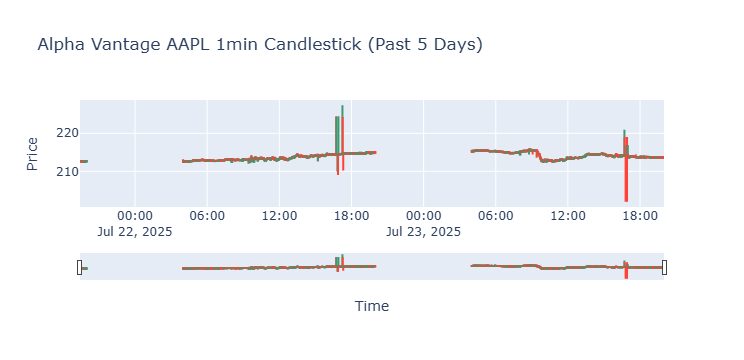

In [12]:
import plotly.graph_objects as go

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=1min&outputsize=full&apikey={ALPHA_VANTAGE_API_KEY}'
response = requests.get(url)
data = response.json()

if 'Time Series (1min)' in data:
    intraday_data = data['Time Series (1min)']
    df = pd.DataFrame.from_dict(intraday_data, orient='index')
    df = df.astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    # Filter for the last 5 days (approximate)
    # 390 minutes in a standard US trading day (9:30 AM to 4:00 PM EST)
    recent_df = df.tail(5 * 390) 
    print("Alpha Vantage AAPL 1min data: ")
    print(recent_df.tail())
    
    # Visualization: 1min Candlestick Chart
    fig = go.Figure(data=[go.Candlestick(x=recent_df.index,
                                        open=recent_df['Open'],
                                        high=recent_df['High'],
                                        low=recent_df['Low'],
                                        close=recent_df['Close'])])
    fig.update_layout(title='Alpha Vantage AAPL 1min Candlestick (Past 5 Days)',
                      xaxis_title='Time',
                      yaxis_title='Price')
    fig.show()
else:
    print("error: ", data)

## (III). Tiingo

### 1. Daily

In [13]:
# Tiingo
from tiingo import TiingoClient
import os

# set API key
os.environ['TIINGO_API_KEY'] = '5a4a9ea706e1c065068704ea40f1a78e17e78e46' 

client = TiingoClient()
ticker_history = client.get_dataframe('AAPL', frequency='daily', startDate='2024-01-01') 

print("Tiingo AAPL data(5 days): ")
print(ticker_history.tail())
# colums include: open, high, low, close, volume, adjOpen, adjHigh, adjLow, adjClose, adjVolume, divCash, splitFactor

Tiingo AAPL data(5 days): 
                            close    high       low    open    volume  \
date                                                                    
2025-07-17 00:00:00+00:00  210.02  211.80  209.5900  210.57  48068141   
2025-07-18 00:00:00+00:00  211.18  211.79  209.7045  210.87  48974591   
2025-07-21 00:00:00+00:00  212.48  215.78  211.6300  212.10  51377434   
2025-07-22 00:00:00+00:00  214.40  214.95  212.2301  213.14  46404072   
2025-07-23 00:00:00+00:00  214.15  215.15  212.4100  215.00  46989301   

                           adjClose  adjHigh    adjLow  adjOpen  adjVolume  \
date                                                                         
2025-07-17 00:00:00+00:00    210.02   211.80  209.5900   210.57   48068141   
2025-07-18 00:00:00+00:00    211.18   211.79  209.7045   210.87   48974591   
2025-07-21 00:00:00+00:00    212.48   215.78  211.6300   212.10   51377434   
2025-07-22 00:00:00+00:00    214.40   214.95  212.2301   213.14   46404

### 2. 1min and Visualization chart

Tiingo AAPL 1min data (latest part):
                             close     high      low     open
date                                                         
2025-07-24 19:13:00+00:00  214.715  214.765  214.685  214.730
2025-07-24 19:14:00+00:00  214.730  214.760  214.700  214.700
2025-07-24 19:15:00+00:00  214.750  214.780  214.695  214.730
2025-07-24 19:16:00+00:00  214.740  214.785  214.725  214.750
2025-07-24 19:17:00+00:00  214.735  214.760  214.700  214.745


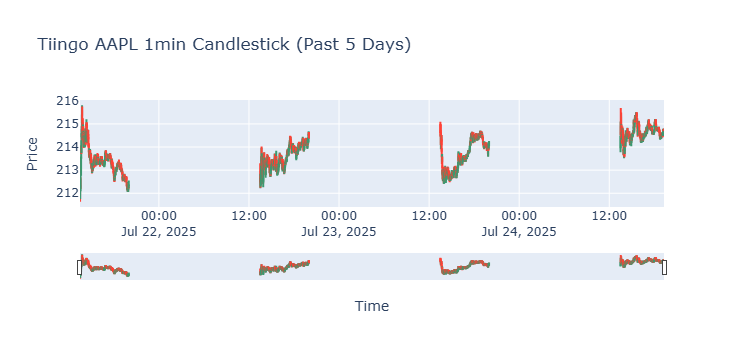

In [14]:
from datetime import datetime, timedelta

client = TiingoClient()
# Set the start date to 5 days ago to fetch recent data
start_date = (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d')
intraday_history = client.get_dataframe('AAPL', frequency='1min', startDate=start_date)

print("Tiingo AAPL 1min data (latest part):")
print(intraday_history.tail())

# Visualization: 1min Candlestick Chart
# Tiingo's get_ticker_price returns lowercase columns: open, high, low, close
fig = go.Figure(data=[go.Candlestick(x=intraday_history.index,
                                    open=intraday_history['open'],
                                    high=intraday_history['high'],
                                    low=intraday_history['low'],
                                    close=intraday_history['close'])])
fig.update_layout(title='Tiingo AAPL 1min Candlestick (Past 5 Days)',
                  xaxis_title='Time',
                  yaxis_title='Price')
fig.show()

## (IV). Twelve Data

### 1. Daily

In [15]:
# Twelve Data
from twelvedata import TDClient

TWELVE_DATA_API_KEY = '321a723f61624e6eb401655e5bce50fb' 
td = TDClient(apikey=TWELVE_DATA_API_KEY)
aapl_ts = td.time_series(
    symbol="AAPL",
    interval="1day",
    outputsize=365,  
    adjust="all" 
).as_pandas()

print("Twelve Data AAPL data(5 days): ")
print(aapl_ts.tail())
# col: datetime, open, high, low, close, volume

Twelve Data AAPL data(5 days): 
                 open       high        low      close    volume
datetime                                                        
2024-02-14  184.20915  184.41788  181.34640  183.04615  54630500
2024-02-13  184.65645  185.09381  182.40998  183.93081  56529500
2024-02-12  187.29055  187.53906  185.67032  186.02816  41781900
2024-02-09  187.51917  188.85115  186.87307  187.71798  45155200
2024-02-08  188.01513  188.16403  185.98995  186.95291  40962000


### 2. 1min and Visualization chart

In [16]:
aapl_ts_oneMin = td.time_series(
    symbol="AAPL",
    interval="1min",
    outputsize=2000,  # 5days(1950 min)
    adjust="all"
).as_pandas()

print("Twelve Data AAPL 1min data: ")
print(aapl_ts_oneMin.tail())

# Visualization: 1min Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=aapl_ts_oneMin.index,
                                    open=aapl_ts_oneMin['open'],
                                    high=aapl_ts_oneMin['high'],
                                    low=aapl_ts_oneMin['low'],
                                    close=aapl_ts_oneMin['close'])])
fig.update_layout(title='Twelve Data AAPL 1min Candlestick (Past 5 Days)',
                  xaxis_title='Time',
                  yaxis_title='Price')
fig.show()

Twelve Data AAPL 1min data: 
                          open      high        low      close  volume
datetime                                                              
2025-07-17 14:31:00  211.24001  211.2750  211.13499  211.16521   97942
2025-07-17 14:30:00  211.28000  211.2800  211.21000  211.23010   72843
2025-07-17 14:29:00  211.19991  211.3400  211.19501  211.28000  105689
2025-07-17 14:28:00  211.10010  211.1998  211.09000  211.19791   59628
2025-07-17 14:27:00  211.17999  211.2200  211.09000  211.11980   64908


## (V). Polygon.io

### 1. Daily

In [17]:
# Polygon.io

POLYGON_API_KEY = 'U9MSn4ejMiGYpYcrLyw94cA7TlpWmhye' 

base_url = "https://api.polygon.io"
endpoint = "/v2/aggs/ticker/AAPL/range/1/day/2024-01-01/2025-07-23" 
params = {
    "adjusted": True, 
    "sort": "asc",
    "limit": 5000,
    "apiKey": POLYGON_API_KEY
}

response = requests.get(base_url + endpoint, params=params)
data = response.json()
if 'results' in data:
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms') 
    df.set_index('t', inplace=True)
    df.columns = ['Volume', 'Volume Weighted', 'Open', 'Close', 'High', 'Low', 'Transactions']  # Polygon col: v, vw, o, c, h, l, n
    print("Polygon.io AAPL data(5 days): ")
    print(df.tail())
else:
    print("error: ", data)

Polygon.io AAPL data(5 days): 
                         Volume  Volume Weighted    Open   Close    High  \
t                                                                          
2025-07-17 04:00:00  48068141.0         210.5606  210.57  210.02  211.80   
2025-07-18 04:00:00  48974591.0         210.8567  210.87  211.18  211.79   
2025-07-21 04:00:00  51377434.0         213.3495  212.10  212.48  215.78   
2025-07-22 04:00:00  46404072.0         213.6492  213.14  214.40  214.95   
2025-07-23 04:00:00  46989301.0         213.7982  215.00  214.15  215.15   

                          Low  Transactions  
t                                            
2025-07-17 04:00:00  209.5900        574972  
2025-07-18 04:00:00  209.7045        478858  
2025-07-21 04:00:00  211.6300        651657  
2025-07-22 04:00:00  212.2301        549182  
2025-07-23 04:00:00  212.4100        497904  


### 2. 1min and Visualization chart

Polygon.io AAPL 1min data: 
                     Volume  Volume Weighted      Open     Close    High  \
t                                                                          
2025-07-23 23:55:00   859.0         213.7045  213.7400  213.7000  213.74   
2025-07-23 23:56:00   919.0         213.6811  213.6800  213.6900  213.69   
2025-07-23 23:57:00  4013.0         213.6433  213.6600  213.6599  213.66   
2025-07-23 23:58:00  1601.0         213.7022  213.7000  213.7000  213.70   
2025-07-23 23:59:00  3704.0         213.6860  213.6782  213.6400  213.74   

                        Low  Transactions  
t                                          
2025-07-23 23:55:00  213.70            13  
2025-07-23 23:56:00  213.66            21  
2025-07-23 23:57:00  213.61            42  
2025-07-23 23:58:00  213.70            18  
2025-07-23 23:59:00  213.60            56  


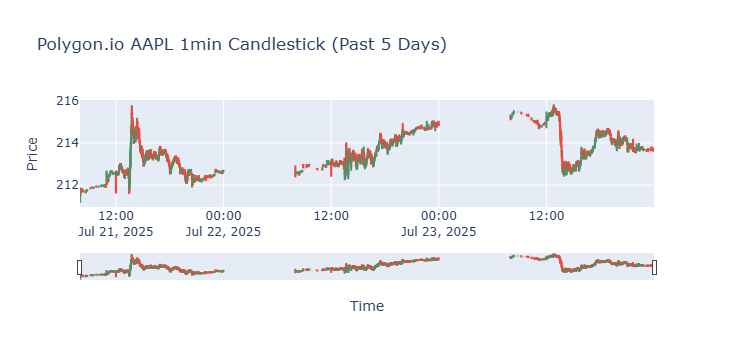

In [18]:
from_date = (datetime.now() - timedelta(days=5)).strftime('%Y-%m-%d')
to_date = datetime.now().strftime('%Y-%m-%d')
endpoint = f"/v2/aggs/ticker/AAPL/range/1/minute/{from_date}/{to_date}"
base_url = "https://api.polygon.io"
params = {
    "adjusted": True,
    "sort": "asc",
    "limit": 50000,
    "apiKey": POLYGON_API_KEY
}

response = requests.get(base_url + endpoint, params=params)
data = response.json()

if 'results' in data:
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.set_index('t', inplace=True)
    df.columns = ['Volume', 'Volume Weighted', 'Open', 'Close', 'High', 'Low', 'Transactions']
    print("Polygon.io AAPL 1min data: ")
    print(df.tail())
    
    # Visualization: 1min Candlestick Chart
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                        open=df['Open'],
                                        high=df['High'],
                                        low=df['Low'],
                                        close=df['Close'])])
    fig.update_layout(title='Polygon.io AAPL 1min Candlestick (Past 5 Days)',
                      xaxis_title='Time',
                      yaxis_title='Price')
    fig.show()
else:
    print("error: ", data)